In [ ]:
import torch

In [ ]:
a = torch.randn(4, 4)
print(a)
b = torch.rand(4, 4)
print(b)
torch.cat((a, b))

tensor([[-0.2835,  1.0059,  1.4246,  0.3460],
        [-0.3229,  0.3035,  0.0143,  2.0499],
        [ 0.3972, -0.0276,  0.1822, -0.8895],
        [ 0.9390,  0.7250, -0.4706, -0.2750]])
tensor([[0.4745, 0.1904, 0.4775, 0.7171],
        [0.1160, 0.6677, 0.7082, 0.8498],
        [0.6191, 0.9698, 0.3778, 0.6229],
        [0.5359, 0.0539, 0.0383, 0.9243]])


tensor([[-0.2835,  1.0059,  1.4246,  0.3460],
        [-0.3229,  0.3035,  0.0143,  2.0499],
        [ 0.3972, -0.0276,  0.1822, -0.8895],
        [ 0.9390,  0.7250, -0.4706, -0.2750],
        [ 0.4745,  0.1904,  0.4775,  0.7171],
        [ 0.1160,  0.6677,  0.7082,  0.8498],
        [ 0.6191,  0.9698,  0.3778,  0.6229],
        [ 0.5359,  0.0539,  0.0383,  0.9243]])

In [ ]:
x = torch.Tensor([1,1,1,1])
y = torch.Tensor([1,1,1,1])

print(x@y)
print(torch.matmul(x, y))
print(torch.mv(x.view(1,-1), y))
print(torch.mm(x.view(1,-1), y.view(-1,1)))


tensor(4.)
tensor(4.)
tensor([4.])
tensor([[4.]])


## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат.

In [ ]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights = torch.tensor(weights)
        self.bias = torch.tensor(bias)

    def forward(self, inputs):
        output = torch.matmul(inputs, self.weights) + self.bias
        return output

In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

In [ ]:
n = Neuron(weights, bias)
yp = n.forward(inputs)
yp

<ipython-input-4-7753b0c2d2b6>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.weights = torch.tensor(weights)


tensor(4.8400)

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат.

In [ ]:
class Linear:
  def __init__(self, weights, biases):
    self.w = weights
    self.b = biases
    pass

  def forward(self, inputs):
    output = torch.matmul(inputs.view(1,-1), self.w) + self.b
    return output

In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]]).T

biases = torch.tensor([3.14, 2.71, 7.2])

In [ ]:
l = Linear(weights, biases)
yp = l.forward(inputs)
yp

tensor([[ 4.8400,  0.1700, 10.3900]])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

class Linear:
  def __init__(self, n_neurons):
    self.weights = torch.randn((n_neurons, 4)).T
    self.biases = torch.randn((1, n_neurons))

  def forward(self, inputs):
    return inputs @ self.weights + self.biases

In [ ]:
Lin = Linear(10)
print(Lin.forward(inputs))

tensor([[-2.8967,  1.0432,  1.7696,  0.8083,  2.3758,  5.5614,  3.2313, -1.0958,
         -3.3952, -3.5816],
        [-1.3898, -0.8047, -3.6131,  2.3016,  5.3336,  6.9903,  2.3059,  0.8640,
         -6.2304,  3.0707],
        [ 1.9214,  0.1428,  8.2365,  2.9306,  3.8685, -3.4143,  5.0389, -1.7372,
         -3.5096, -4.2134]])


2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [ ]:
class Linear:
  def __init__(self, batch_size, n_neuron, n_features):
    self.batch_size = batch_size
    self.weights = torch.randn(n_features, n_neuron)
    self.biases = torch.randn(n_neuron)

  def forward(self, inputs):
    y_pred = torch.matmul(inputs.view(self.batch_size,-1), self.weights)+self.biases
    return y_pred

In [ ]:
inputs = torch.tensor([[1, 2, 3, 4],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])


In [ ]:
l = Linear(inputs.size()[0], 1, 4)
yp = l.forward(inputs)
yp

tensor([[0.5364],
        [0.8523],
        [3.3906]])

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7).

In [ ]:
inputs = torch.tensor([[1, 2, 3, 4],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [ ]:
l1 = Linear(inputs.size()[0], 1, 4)
yp = l1.forward(inputs) # матрица 3x1
l2 = Linear(yp.size()[0], 7, 1)
rp = l2.forward(yp)
rp

tensor([[  6.3481,  15.2332,  -5.4317,  -5.7195,  -2.4711,   4.5598, -17.0218],
        [  9.2065,  21.4554,  -8.0437,  -8.7527,  -3.6473,   6.5907, -24.2623],
        [  0.8166,   3.1921,  -0.3772,   0.1502,  -0.1951,   0.6296,  -3.0103]])

## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
class ReLU:
  def forward(self, inputs):
    res = torch.where(inputs>0, inputs, 0)
    return res

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [ ]:
relu = ReLU()
relu.forward(inputs)

tensor([[1.0000, 2.0000, 3.0000, 2.5000],
        [2.0000, 5.0000, 0.0000, 2.0000],
        [0.0000, 2.7000, 3.3000, 0.0000]])

2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [ ]:
import torch

In [ ]:
import torch.nn.functional as F

In [ ]:
class Softmax:
  def forward(self, inputs):
    return torch.exp(inputs)/sum(torch.exp(inputs))

In [ ]:
matrix = torch.randn(4, 3)
softmax = Softmax()
softmax_output = softmax.forward(matrix)

In [ ]:
print(softmax_output)

tensor([[0.3291, 0.4115, 0.6495],
        [0.0797, 0.2504, 0.1021],
        [0.2668, 0.2026, 0.1303],
        [0.3244, 0.1355, 0.1181]])


2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
import torch

class ELU:
    def __init__(self, alpha):
        self.alpha = alpha

    def forward(self, inputs):
        return torch.where(inputs >= 0, inputs, self.alpha * (torch.exp(inputs) - 1))

matrix = torch.randn(4, 3)
elu = ELU(alpha=1.0)
elu_output = elu.forward(matrix)

print(elu_output)


tensor([[-0.2180,  0.8218, -0.8630],
        [ 1.7406,  1.9853, -0.7540],
        [-0.2404,  0.9459,  0.0112],
        [-0.0109,  1.2216,  0.2435]])


## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
class MSELoss:
    def forward(self, y_pred, y_true):
        squared_diff = (y_pred - y_true) ** 2
        mse = torch.mean(squared_diff)
        return mse

In [ ]:
inputs = torch.tensor([[1, 2, 3, 4],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

In [ ]:
y_pred = torch.mean(inputs, axis=1)

In [ ]:
mse_loss = MSELoss()
loss = mse_loss.forward(y_pred, y)
print(loss)

tensor(3.5685)


In [ ]:
loss = torch.nn.MSELoss()
print(loss(y_pred, y))

tensor(3.5685)


2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
class CategoricalCrossentropyLoss:
  def forward(self, y_pred, y_true):
    softmax_output = F.softmax(y_pred, dim=1)
    loss = 0
    for i in range(len(y_pred)):
        loss = loss + (-1 * y_true[i]*torch.log(y_pred[i]))
    return loss

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                        [2, 5, -1, 2],
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [ ]:
cce_loss = CategoricalCrossentropyLoss()
linear_layer = torch.nn.Linear(4, 3)
y_pred = linear_layer(inputs)
loss = cce_loss.forward(y_pred, y)
print(loss)

tensor([    nan, -0.9461,     nan], grad_fn=<AddBackward0>)


2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [ ]:
import torch

class MSELossL2:
    def __init__(self, lambda_):
        self.lambda_ = lambda_
    def data_loss(self, y_pred, y_true):
        squared_diff = (y_pred - y_true) ** 2
        mse = torch.mean(squared_diff)
        return mse

    def reg_loss(self, layer):
        l2_reg = 0.0
        for param in layer.parameters():
            l2_reg += torch.norm(param, p=2) ** 2
        return 0.5 * self.lambda_ * l2_reg

    def forward(self, y_pred, y_true, layer):
        data_loss = self.data_loss(y_pred, y_true)
        reg_loss = self.reg_loss(layer)
        return data_loss + reg_loss


mse_loss_l2 = MSELossL2(lambda_=0.01)

inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])
y_true = torch.tensor([2, 3, 4], dtype=torch.float32)


y_pred = torch.mean(inputs, axis=1)


loss = mse_loss_l2.forward(y_pred, y_true, linear_layer)

print("Предсказанные значения:")
print(y_pred)
print("Истинные значения:")
print(y_true)
print("Значение MSE с L2 регуляризацией:")
print(loss.item())


Предсказанные значения:
tensor([2.1250, 2.0000, 0.9250])
Истинные значения:
tensor([2., 3., 4.])
Значение MSE с L2 регуляризацией:
3.4990038871765137


## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [ ]:
class SquaredLoss:
  def forward(self, c, y_true):
    return (c-y_true)**2

  def backward(self, c, y_true):
    self.dinput = 2*(c-y_true)


2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [ ]:
class Neuron:
  def __init__(self, n_inputs):
    self.w = torch.randn(n_inputs)
    self.b = torch.randn(1)


  def forward(self, inputs):
    self.inputs = inputs
    return torch.dot(inputs, self.w)+self.b   #dot для переумножения одинаковых векторов

  def backward(self, dvalue):

    self.dweights = self.inputs*dvalue
    self.dinput =  dvalue * self.w
    self.dbias = dvalue # df/db


In [ ]:
from sklearn.datasets import make_regression
import torch
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(torch.float32)
y = torch.from_numpy(y).to(torch.float32)

In [ ]:
X.size(), y.size()

(torch.Size([100, 4]), torch.Size([100]))

2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [ ]:
n_inputs = X.size()[1]
lr = 0.001 #  скорость обучения
n_epoch = 1000 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()

In [ ]:
losses = []
for epoch in range(n_epoch):
  for x_example, y_example in zip(X, y):
    y_pred = neuron.forward(x_example) # <прогон через нейрон> vector
    curr_loss = loss.forward(y_pred, y_example)# <прогон через функцию потерь>
    losses.append(curr_loss)
    loss.backward(y_pred, y_example)
    neuron.backward(loss.dinput)

    neuron.w -=lr*neuron.dweights
    neuron.b -=lr*neuron.dbias

In [ ]:
coef

array([51.43014631, 44.98644025, 29.03889659, 16.75412475])

In [ ]:
neuron.w

tensor([51.4302, 44.9863, 29.0389, 16.7542])

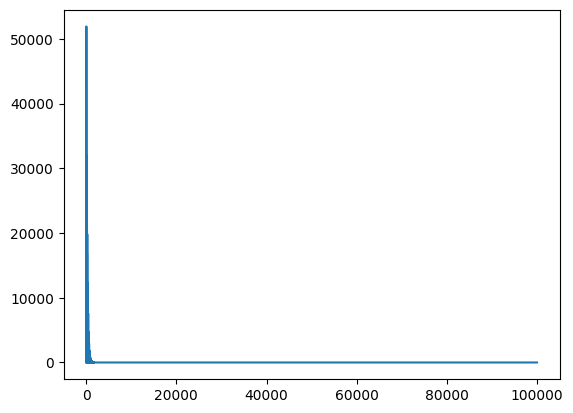

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(losses)

2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи:
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами


In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return ((y_pred.view(-1,1) - y_true.view(-1,1))**2).mean()

  def backward(self, y_pred, y_true):
    self.dinput = -2 *(y_true.view(-1, 1) - y_pred.view(-1, 1)) / y_true.shape[0]

2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными.

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [ ]:
class Neuron:
    def __init__(self, n_inputs):
        self.n_inputs = n_inputs
        self.weights = torch.randn(1, n_inputs).T
        self.bias = torch.randn(1)

    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.bias

    def backward(self, dvalue):
        self.dweights = torch.matmul(self.inputs.T, dvalue) # df/dW
        self.dbias = dvalue.sum()# df/db


2.4.2.3 Допишите цикл для настройки весов нейрона

In [ ]:
n_inputs = X.shape[1]
learning_rate = 0.001
n_epoch = 1000

neuron = Neuron(n_inputs)
loss = MSELoss()

losses = []

for epoch in range(n_epoch):
    y_pred =  neuron.forward(X)
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss)

    loss.backward(y_pred, y)
    neuron.backward(loss.dinput)

    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias

In [ ]:
losses[::10]

[tensor(7038.6377),
 tensor(6698.7051),
 tensor(6375.2988),
 tensor(6067.6089),
 tensor(5774.8677),
 tensor(5496.3452),
 tensor(5231.3457),
 tensor(4979.2095),
 tensor(4739.3071),
 tensor(4511.0430),
 tensor(4293.8477),
 tensor(4087.1819),
 tensor(3890.5315),
 tensor(3703.4084),
 tensor(3525.3486),
 tensor(3355.9094),
 tensor(3194.6711),
 tensor(3041.2351),
 tensor(2895.2200),
 tensor(2756.2654),
 tensor(2624.0278),
 tensor(2498.1807),
 tensor(2378.4121),
 tensor(2264.4275),
 tensor(2155.9460),
 tensor(2052.6992),
 tensor(1954.4341),
 tensor(1860.9072),
 tensor(1771.8895),
 tensor(1687.1619),
 tensor(1606.5166),
 tensor(1529.7550),
 tensor(1456.6893),
 tensor(1387.1400),
 tensor(1320.9371),
 tensor(1257.9183),
 tensor(1197.9292),
 tensor(1140.8232),
 tensor(1086.4613),
 tensor(1034.7102),
 tensor(985.4437),
 tensor(938.5416),
 tensor(893.8900),
 tensor(851.3800),
 tensor(810.9084),
 tensor(772.3761),
 tensor(735.6901),
 tensor(700.7610),
 tensor(667.5041),
 tensor(635.8387),
 tensor(60

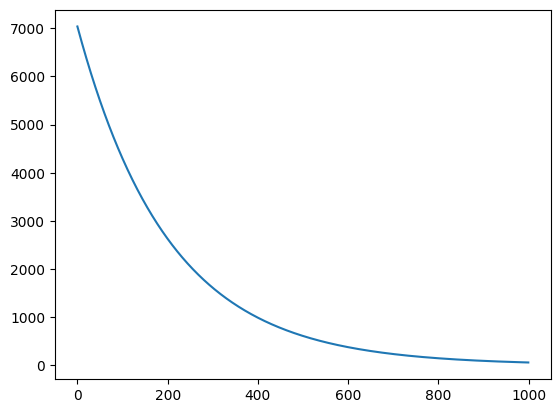

In [ ]:
plt.plot(losses)

2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [ ]:
class Linear:
    def __init__(self, n_features, n_neurons):
        # <создать атрибуты объекта weights и biases>
        self.weights = torch.randn(n_neurons, n_features).T
        self.biases = torch.randn(n_neurons)

    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases # <реализовать логику слоя>

    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues) # df/dW
        self.dbiases = torch.matmul(torch.ones(dvalues.shape[0]), dvalues) # df/db
        self.dinputs = torch.matmul(dvalues, self.weights.T) # df/dX

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [ ]:
n_inputs = X.shape[1]
learning_rate = 0.001
n_epoch = 1000

layer = Linear(n_inputs, 1)
loss = MSELoss()

losses = []

for epoch in range(n_epoch):
    y_pred = layer.forward(X)
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss)
    loss.backward(y_pred, y)
    layer.backward(loss.dinput)


    layer.weights -= learning_rate * layer.dweights
    layer.biases -= learning_rate * layer.dbiases

losses[::200]

[tensor(6931.5669),
 tensor(2582.4353),
 tensor(969.0913),
 tensor(366.5332),
 tensor(139.8431)]

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [ ]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

In [ ]:
class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output

  def backward(self, dvalues):
    self.dinputs = dvalues.clone()
    self.dinputs[self.inputs <= 0] = 0

In [ ]:
# создание компонентов сети
fc1 = Linear(X.shape[1], 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

loss = MSELoss()
lr = 0.001
n_epoch = 20000

y_res = []
for epoch in range(n_epoch):
    y_pred = fc2.forward(relu1.forward(fc1.forward(X)))

    data_loss = loss.forward(y_pred, y)

    if epoch % 200 == 0:
        print(f'epoch {epoch} mean loss {data_loss}')
        y_res.append(y_pred)

    loss.backward(y_pred, y)
    fc2.backward(loss.dinput)
    relu1.backward(fc2.dinputs)
    fc1.backward(relu1.dinputs)

    fc1.weights -= lr * fc1.dweights
    fc1.biases -= lr * fc1.dbiases

    fc2.weights -= lr * fc2.dweights
    fc2.biases -= lr * fc2.dbiases

epoch 0 mean loss 0.24477984011173248
epoch 200 mean loss 0.11061416566371918
epoch 400 mean loss 0.09296254068613052
epoch 600 mean loss 0.08371812105178833
epoch 800 mean loss 0.0765569806098938
epoch 1000 mean loss 0.07051676511764526
epoch 1200 mean loss 0.06554388254880905
epoch 1400 mean loss 0.060799337923526764
epoch 1600 mean loss 0.0568033903837204
epoch 1800 mean loss 0.053066760301589966
epoch 2000 mean loss 0.04981815442442894
epoch 2200 mean loss 0.046883974224328995
epoch 2400 mean loss 0.04403788968920708
epoch 2600 mean loss 0.04149983823299408
epoch 2800 mean loss 0.03906545788049698
epoch 3000 mean loss 0.03667658194899559
epoch 3200 mean loss 0.034544121474027634
epoch 3400 mean loss 0.032528165727853775
epoch 3600 mean loss 0.030547885224223137
epoch 3800 mean loss 0.028712300583720207
epoch 4000 mean loss 0.027046585455536842
epoch 4200 mean loss 0.02543296106159687
epoch 4400 mean loss 0.02396615967154503
epoch 4600 mean loss 0.022668156772851944
epoch 4800 mean 

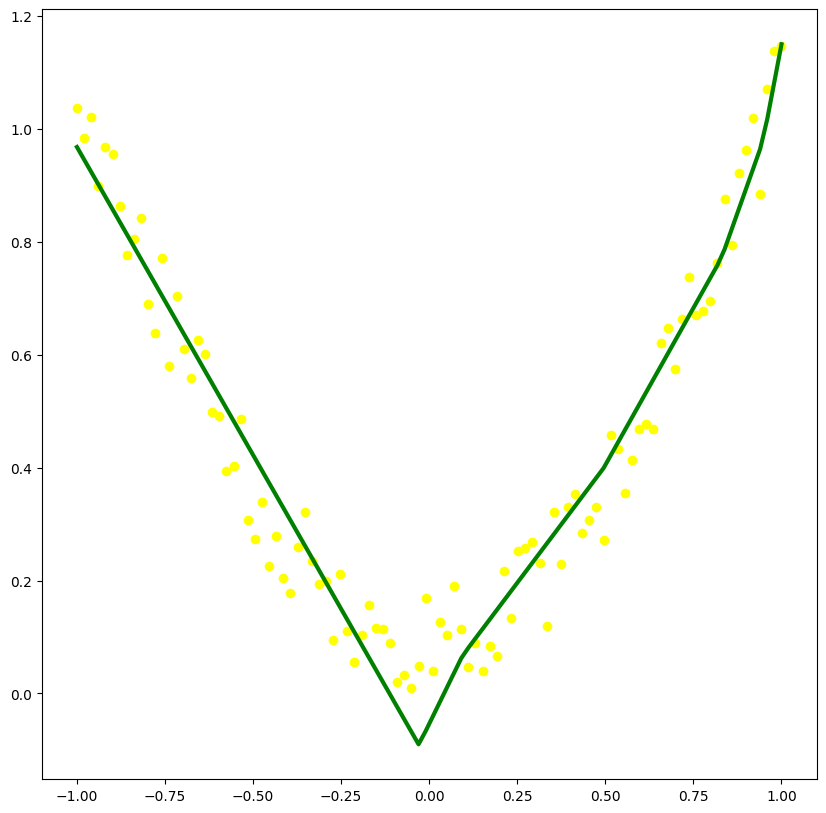

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(10, 10))

axs.scatter(X.numpy(), y.numpy(), color = "yellow")
axs.plot(X.numpy(), y_res[-1].detach().numpy(), 'g-', lw=3)
